In [9]:
import logging
import os
import random
import subprocess

import networkx as nx
import osmnx as ox
from matplotlib import pyplot as plt

import bcnetwork as bc

# Get graph from OSM

## Utils

In [2]:
pass

## Load graph

In [3]:
file_cache = '../instances/treinta-y-tres/treinta_y_tres.yaml'
file_cache_dir = os.path.dirname(file_cache)

# Fix graph import from yaml
if os.path.isfile(file_cache) and False:
    g = bc.persistance.read_graph_from_yaml(file_cache)
else:
    g = ox.graph_from_place('Treinta y Tres, Treinta y Tres, Uruguay')
    g = bc.persistance.normalize_graph_shape(g)

    if not os.path.isdir(file_cache_dir):
        os.mkdir(file_cache_dir)
    bc.persistance.write_graph_to_yaml(g, file_cache)

Nodes: 1509
Edges: 4491
Multigraph: False
Directed: True


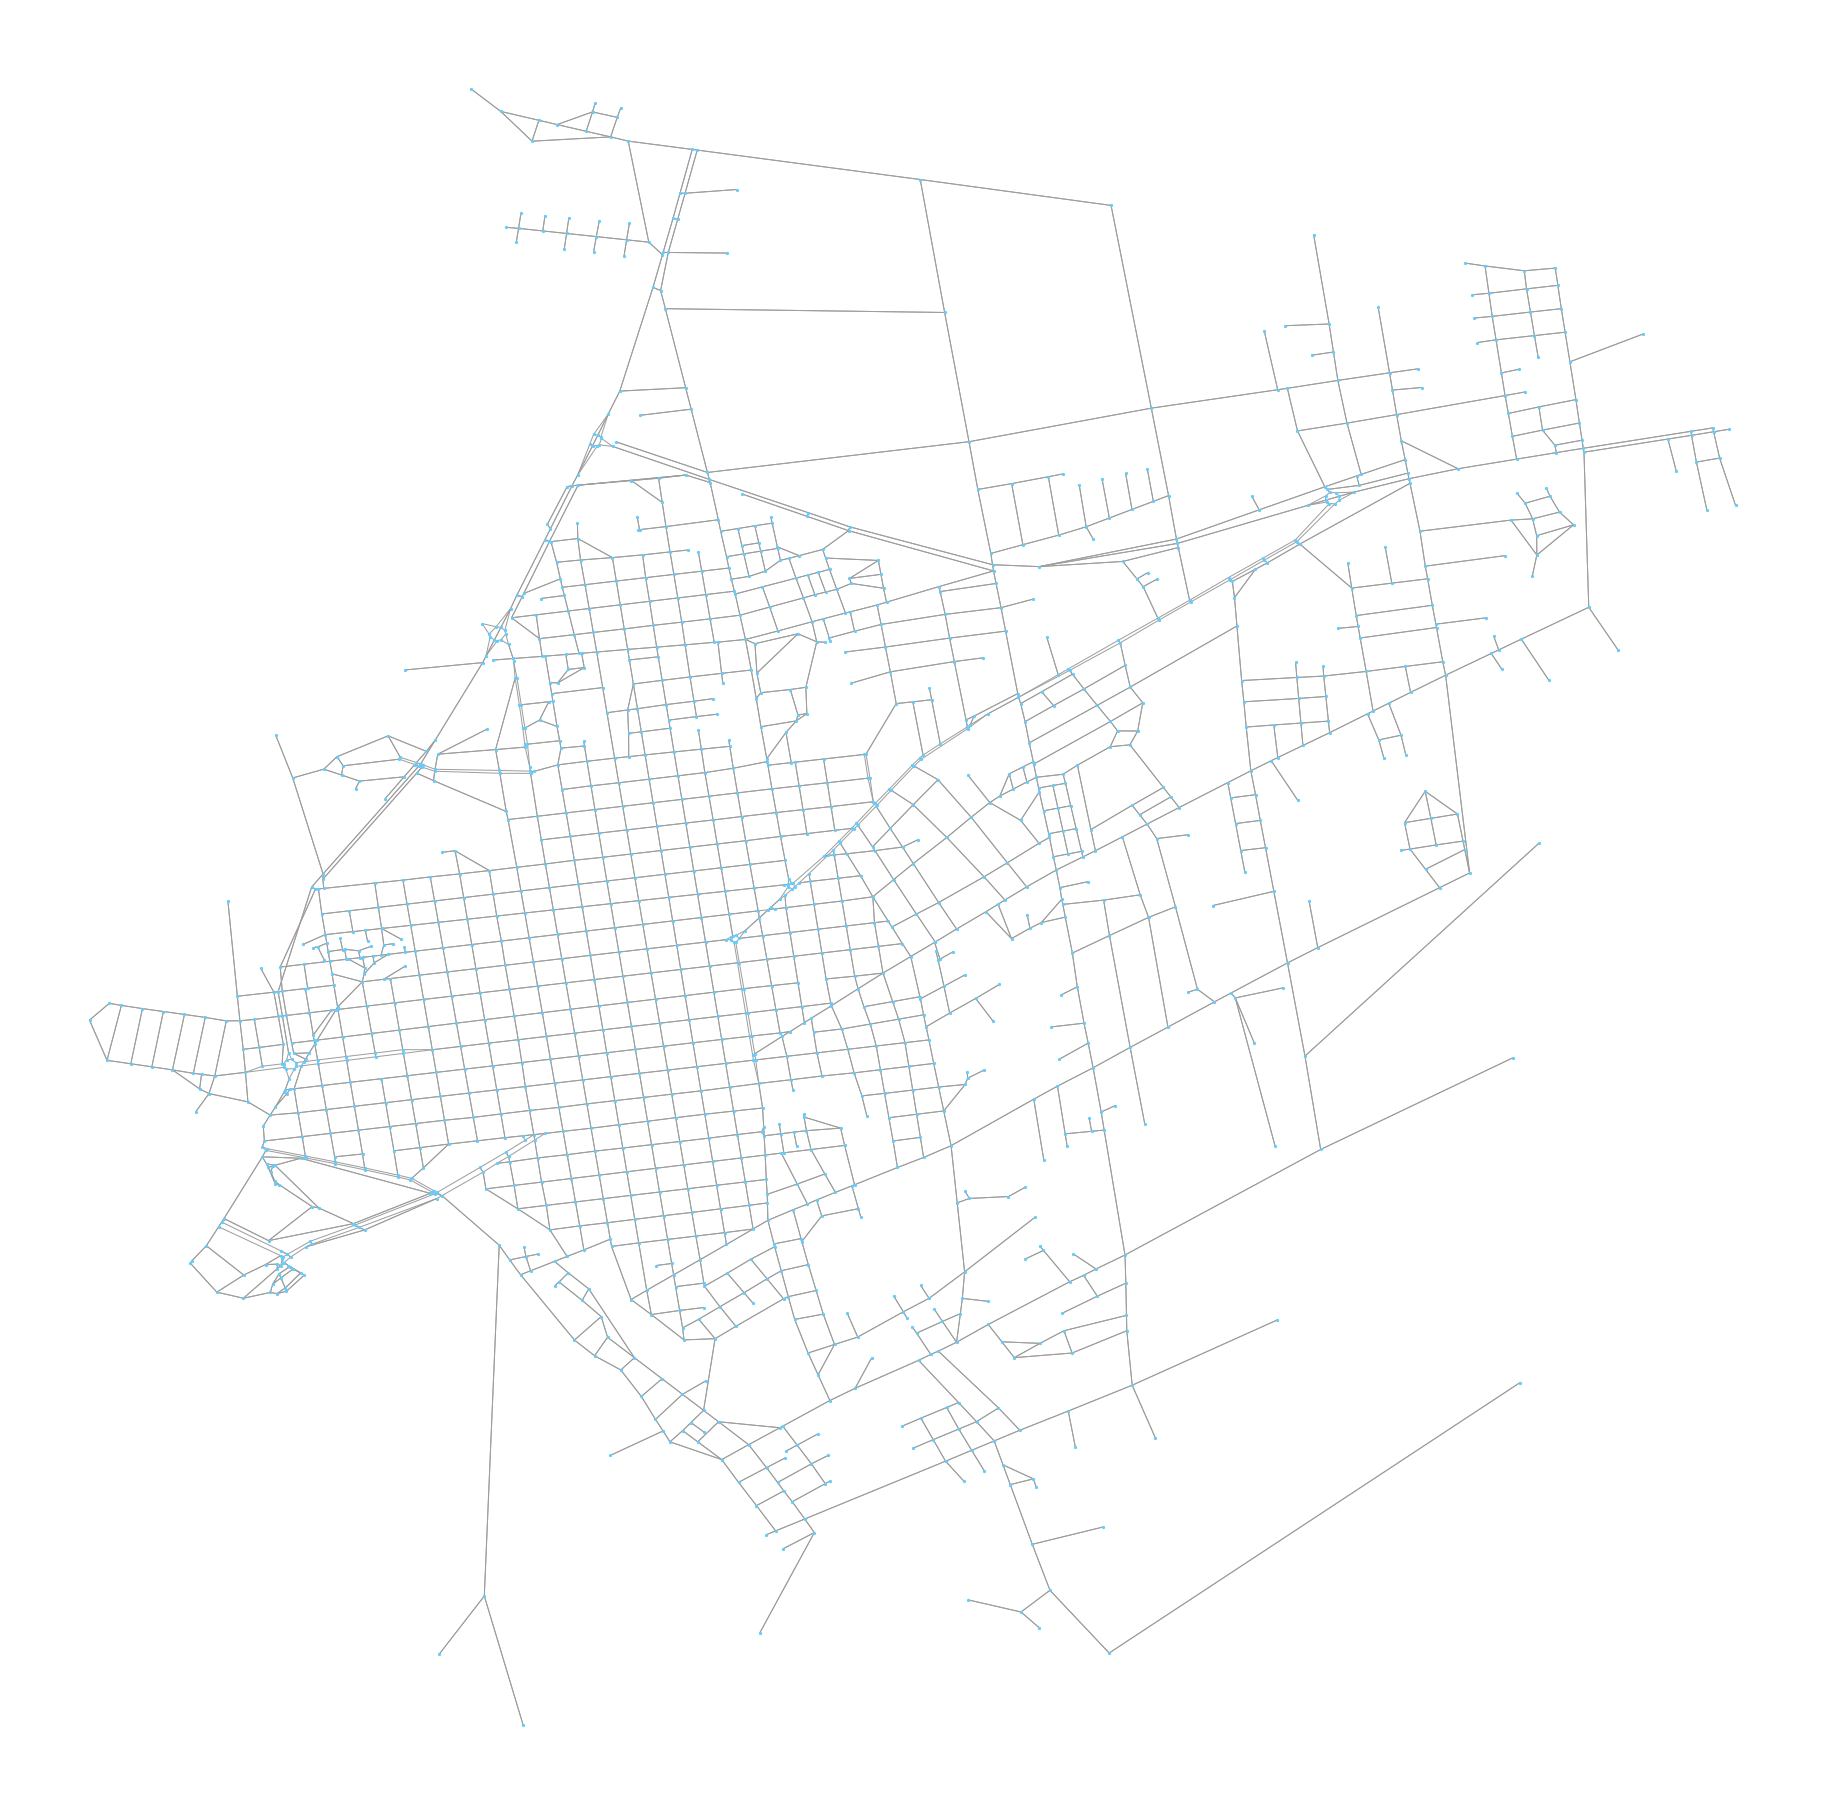

In [4]:
print(f'Nodes: {g.number_of_nodes()}')
print(f'Edges: {g.number_of_edges()}')
print(f'Multigraph: {g.is_multigraph()}')
print(f'Directed: {g.is_directed()}')

bc.draw.draw_graph(g, with_labels=False, node_size=5, width=1)

## Problem definition

The origin destination matrix, demand and demand transfer decisions are all random.

### Data generation

In [16]:
odpair_count = 10
breakpoint_count = 4

nodes = list(g.nodes())
origins = random.sample(nodes, odpair_count)
destinations = random.sample(nodes, odpair_count)
demands = [int(random.uniform(100, 1000)) for i in range(odpair_count)]

improvements_breakpoints = [1] + list(sorted([random.uniform(0.5, 1) for i in range(breakpoint_count)], reverse=True))
transfer_breakpoints = [0] +  list(sorted([random.uniform(0, 1) for i in range(breakpoint_count)]))

odpairs = list(zip(origins, destinations, demands))
breakpoints = list(zip(transfer_breakpoints, improvements_breakpoints))

## Running the exact model

Now we export the graph and previously generated data into mathprog according to the exact model definition.

### Write things down to the data file

In [17]:
model_file = '../exact/single_level.mod'
data_file = '../instances/treinta-y-tres/data.dat'
output_file = '../instances/treinta-y-tres/output.out'

budget = 1500

In [18]:
with open(data_file, 'w') as f:
    f.write("data;\n\n")
    bc.transform.graph_to_mathprog(g, f)
    bc.transform.origin_destination_pairs_to_mathprog(
        g,
        odpairs,
        breakpoints,
        f,
    )
    
    f.write(f"param B := {budget};\n")
    f.write("end;\n")

### Run glpsol

In [12]:
command = subprocess.run(
    ['glpsol', '-d', data_file, '-m', model_file, '-o', output_file],
    capture_output=True
)

sys.stdout.write(command.)

In [13]:
command

CompletedProcess(args=['glpsol', '-d', '../instances/treinta-y-tres/data.dat', '-m', '../exact/single_level.mod', '-o', '../instances/treinta-y-tres/output.out'], returncode=1)